# Decomposed ZFOURGE Galaxies UVJ Colour Analysis
This script is intended to be used to perform a colour analysis on the UVJ colours that have been calculated in the script SEDProcessing_DecomposedSEDs_Full. This will extend the analysis and will atempt to create some metric to be able to explore the UVJ colour space. Additinally we also will attempt to read in and combine the UVJ colours as per the id's with actual data from the ZFOURGE survey to explore the UVJ colour space in more detail. This will be intended to be used as a base for the rest of my analysis in other colour spaces.

In [75]:
# Read in required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from carf import *


In [76]:
# Now we can read in the colours of the galaxies
decomposed_colours = pd.read_csv('datasets/full_zfourge_decomposed/decomposed_colours.csv')

In [77]:
decomposed_colours.isna().sum()

# Drop the rows with missing values
decomposed_colours = decomposed_colours.dropna()

# recount the number of missing values
decomposed_colours.isna().sum()


ID               0
UV_Full          0
VJ_Full          0
UV_Decomposed    0
VJ_Decomposed    0
zpk              0
dtype: int64

In [78]:
# Quickly create a pairplot to se the relationships between the colours, from fully decomposed to the original galaxy colours
sns.pairplot(decomposed_colours)

Average VJ Full: 0.5803520648009484Average UV Full: 0.8537970203978104Average VJ Galaxy: 0.5726139410875686Average UV Galaxy: 0.8803874995939499


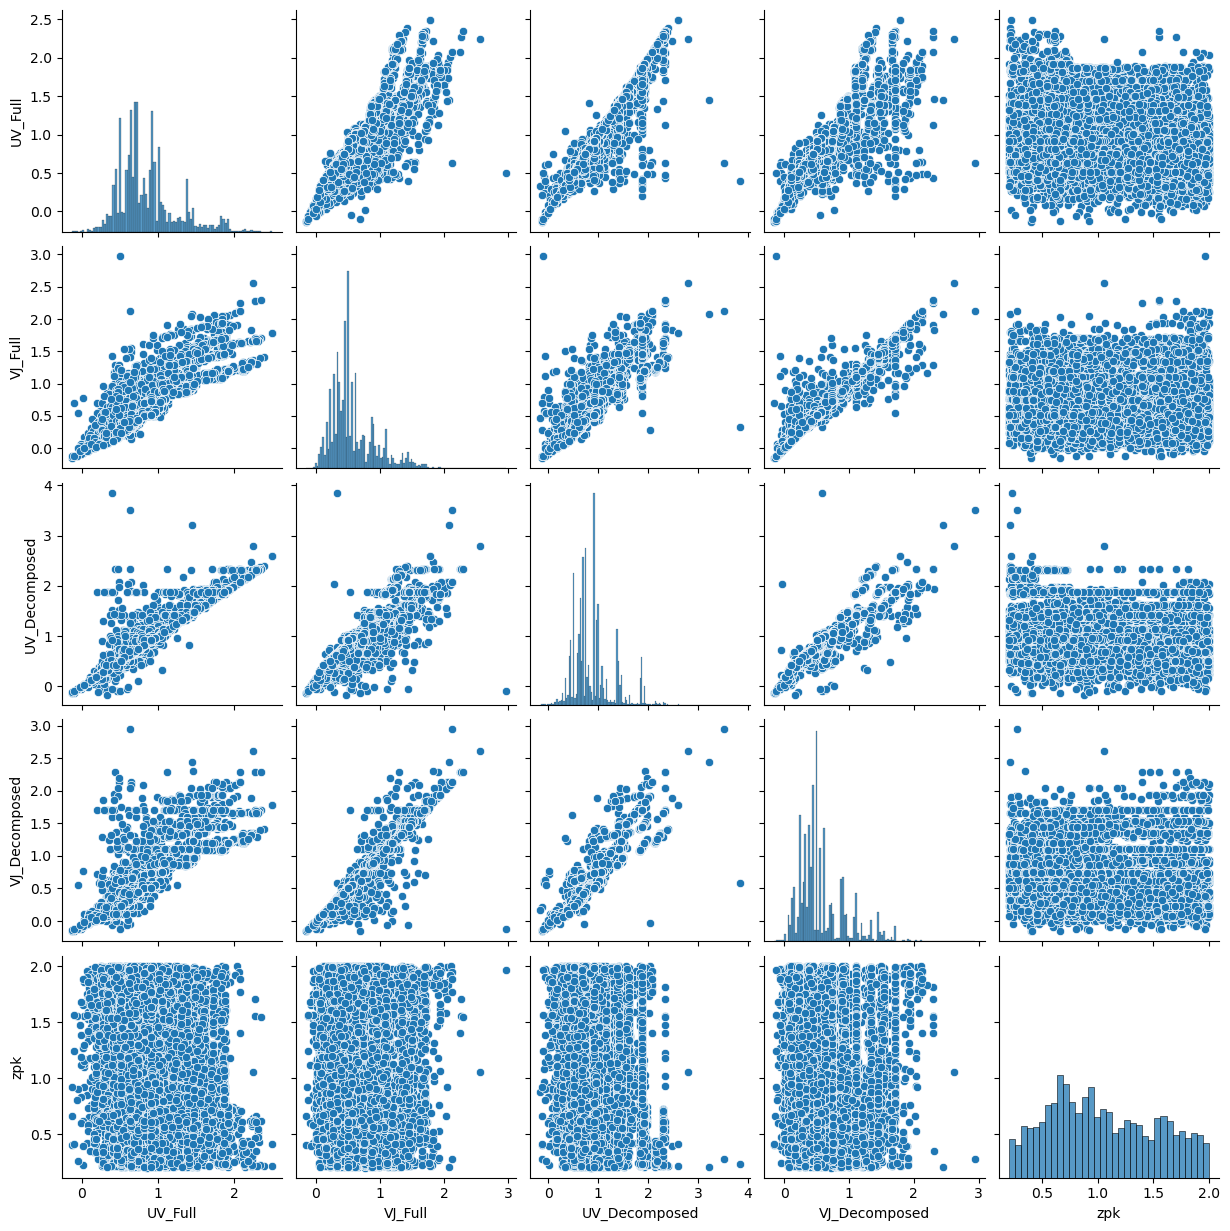

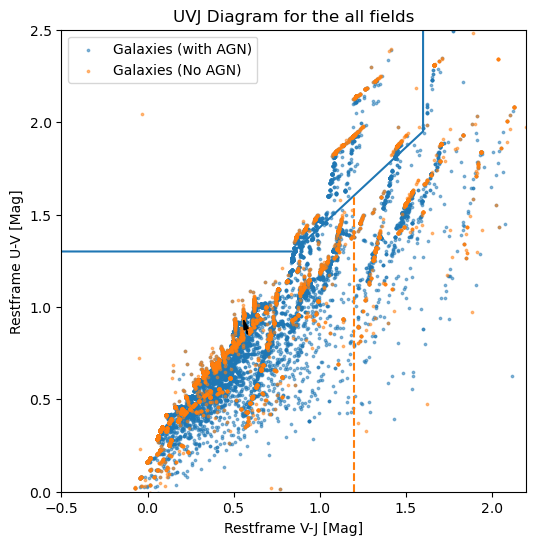

In [79]:
# Now we would like to make two plots, one for the fully decomposed colours and one for the original galaxy colours. These should be UVJ colour plots and should highlight the difference between the two sets of colours.

# extract the fully decomposed colours
vj_galaxy_colours = decomposed_colours['VJ_Decomposed']
uv_galaxy_colours = decomposed_colours['UV_Decomposed']

# extract the original galaxy colours
vj_full_colours = decomposed_colours['VJ_Full']
uv_full_colours = decomposed_colours['UV_Full']



plt.figure(figsize=(6, 6))

xmax = 2.2
ymax = 2.5
xmin = -0.5
ymin = 0


# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]

# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# as all the points have associated names, plot the names
#for i, txt in enumerate(df['ID']):
#    plt.annotate(txt, (x[i], y[i]))
    
# plot the points
plt.scatter(vj_full_colours, uv_full_colours, s=3, alpha=0.5, label='Galaxies (with AGN)')

plt.scatter(vj_galaxy_colours, uv_galaxy_colours, s=3, alpha=0.5, label='Galaxies (No AGN)')


# Instead of plotting all arrows, define an average arrow 
# we want to get the average location of each set of points, and plot the transition


# Get the average location of each set of points
avg_vj_full = np.mean(vj_full_colours)
avg_uv_full = np.mean(uv_full_colours)

avg_vj_galaxy = np.mean(vj_galaxy_colours)
avg_uv_galaxy = np.mean(uv_galaxy_colours)


print(f'Average VJ Full: {avg_vj_full}'
      f'Average UV Full: {avg_uv_full}'
      f'Average VJ Galaxy: {avg_vj_galaxy}'
      f'Average UV Galaxy: {avg_uv_galaxy}')

# Plot the average arrow
plt.arrow(avg_vj_full, avg_uv_full, avg_vj_galaxy - avg_vj_full, avg_uv_galaxy - avg_uv_full, head_width=0.025, head_length=0.05, fc='k', ec='k')



# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the all fields')
plt.legend()
#plt.savefig('outputs/UVJ_Diagram_with_AGN_decom_Allfields_Avg.png')
plt.show()

Average VJ Full: 1.3016428795958024Average UV Full: 1.5869382610569924Average VJ Galaxy: 1.3179292851207403Average UV Galaxy: 1.665006580131199


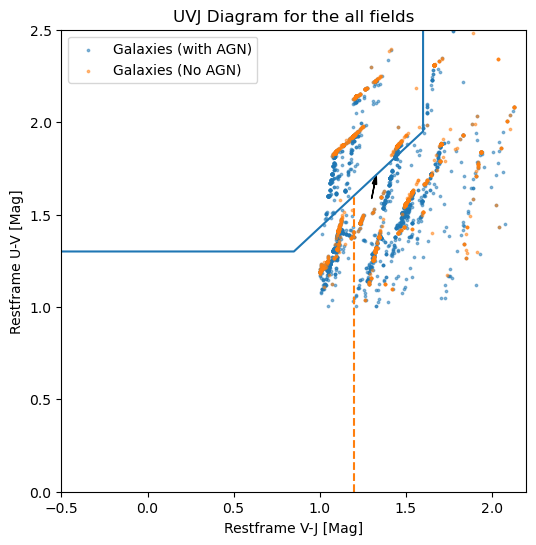

In [80]:
# We would like to extract subsets of this data
# extract the fully decomposed colours


# Only select rows which have a UV colour of 1 or great AND a VJ colour of 0.75 or greater

uv_thresh = 1
vj_thresh = 1

condition = (decomposed_colours['UV_Decomposed'] >= uv_thresh) & (decomposed_colours['VJ_Decomposed'] >= vj_thresh)

# additional constraint on full colours
condition = condition & (decomposed_colours['UV_Full'] >= uv_thresh) & (decomposed_colours['VJ_Full'] >= vj_thresh)


decomposed_colours_filtered = decomposed_colours[condition]


vj_galaxy_colours = decomposed_colours_filtered['VJ_Decomposed']
uv_galaxy_colours = decomposed_colours_filtered['UV_Decomposed']

# extract the original galaxy colours
vj_full_colours = decomposed_colours_filtered['VJ_Full']
uv_full_colours = decomposed_colours_filtered['UV_Full']


# We would like to filter the colours to only include the galax


plt.figure(figsize=(6, 6))

xmax = 2.2
ymax = 2.5
xmin = -0.5
ymin = 0


# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]

# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# as all the points have associated names, plot the names
#for i, txt in enumerate(df['ID']):
#    plt.annotate(txt, (x[i], y[i]))
    
# plot the points
plt.scatter(vj_full_colours, uv_full_colours, s=3, alpha=0.5, label='Galaxies (with AGN)')

plt.scatter(vj_galaxy_colours, uv_galaxy_colours, s=3, alpha=0.5, label='Galaxies (No AGN)')


# Instead of plotting all arrows, define an average arrow 
# we want to get the average location of each set of points, and plot the transition


# Get the average location of each set of points
avg_vj_full = np.mean(vj_full_colours)
avg_uv_full = np.mean(uv_full_colours)

avg_vj_galaxy = np.mean(vj_galaxy_colours)
avg_uv_galaxy = np.mean(uv_galaxy_colours)


print(f'Average VJ Full: {avg_vj_full}'
      f'Average UV Full: {avg_uv_full}'
      f'Average VJ Galaxy: {avg_vj_galaxy}'
      f'Average UV Galaxy: {avg_uv_galaxy}')

# Plot the average arrow
plt.arrow(avg_vj_full, avg_uv_full, avg_vj_galaxy - avg_vj_full, avg_uv_galaxy - avg_uv_full, head_width=0.025, head_length=0.05, fc='k', ec='k')



# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the all fields')
plt.legend()
#plt.savefig('outputs/UVJ_Diagram_with_AGN_decom_Allfields_Avg.png')
plt.show()

In [81]:
# We want to do a similar technique but instead  we want to create 10 different thresholds ranging from 0.5 to 1 in steps of 0.05
thresholds = np.arange(0.5, 1.05, 0.05)
print(thresholds)

[0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


Average VJ Full: 0.8358965143436026Average UV Full: 1.1315134616389388Average VJ Galaxy: 0.8390284077008605Average UV Galaxy: 1.1752200360386706
Average VJ Full: 0.9177567033848908Average UV Full: 1.2003424876441593Average VJ Galaxy: 0.9224339036791216Average UV Galaxy: 1.2489128347409306
Average VJ Full: 0.9679569920394402Average UV Full: 1.2436267673978114Average VJ Galaxy: 0.9738907431264751Average UV Galaxy: 1.2954712342657135
Average VJ Full: 1.0377219026462852Average UV Full: 1.300360164194534Average VJ Galaxy: 1.04593790984007Average UV Galaxy: 1.3584055983847814
Average VJ Full: 1.0596380937312542Average UV Full: 1.3362902334212494Average VJ Galaxy: 1.068590080863525Average UV Galaxy: 1.396030725718155
Average VJ Full: 1.1122780407982251Average UV Full: 1.4062642302523287Average VJ Galaxy: 1.1239215916703715Average UV Galaxy: 1.4729385281435965
Average VJ Full: 1.1204344583382084Average UV Full: 1.416181453249142Average VJ Galaxy: 1.1314001989602263Average UV Galaxy: 1.48171431

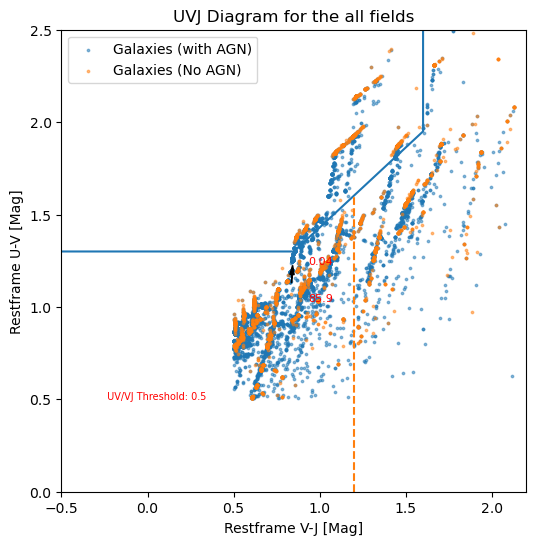

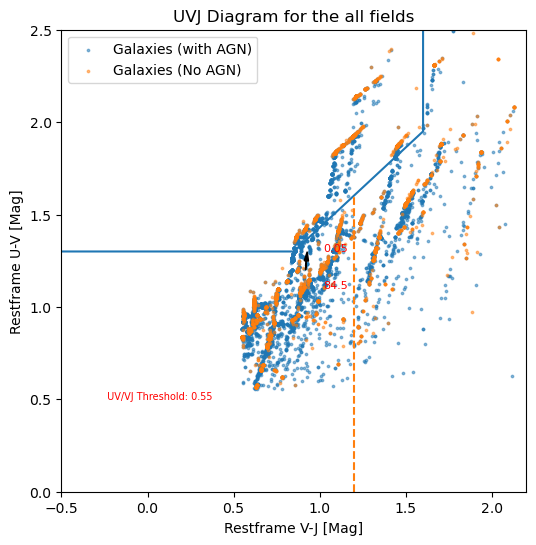

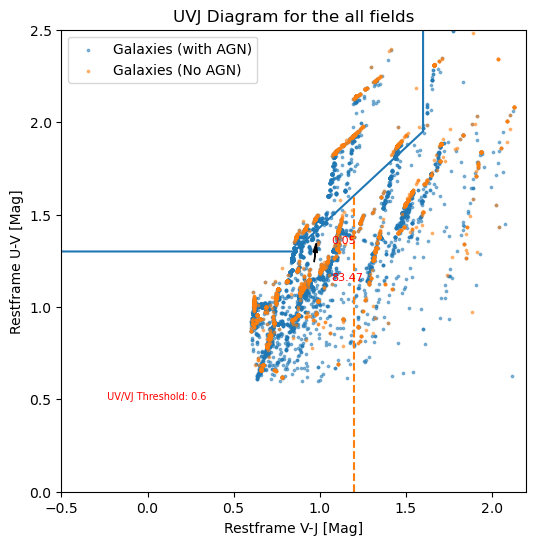

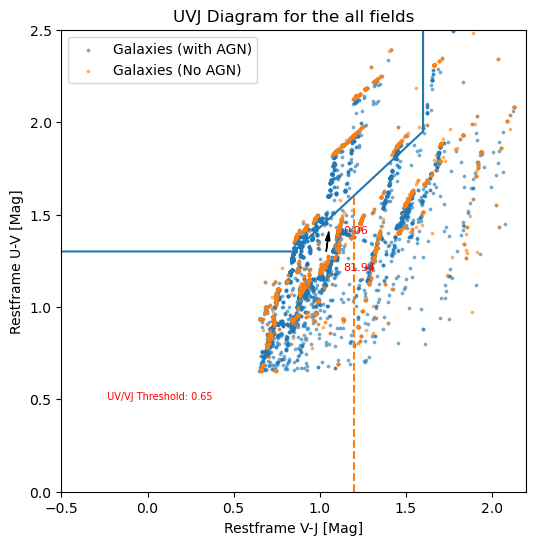

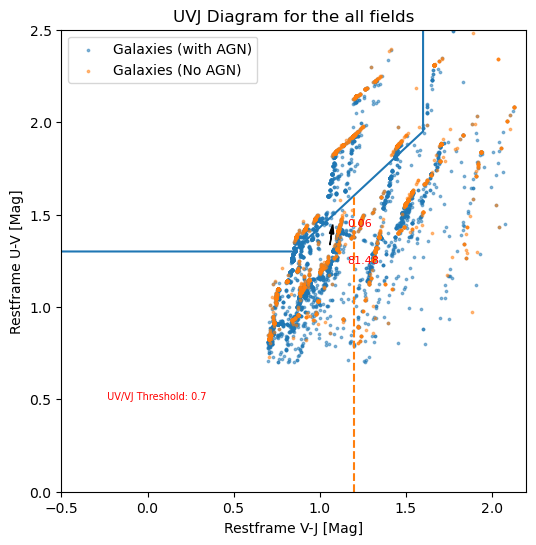

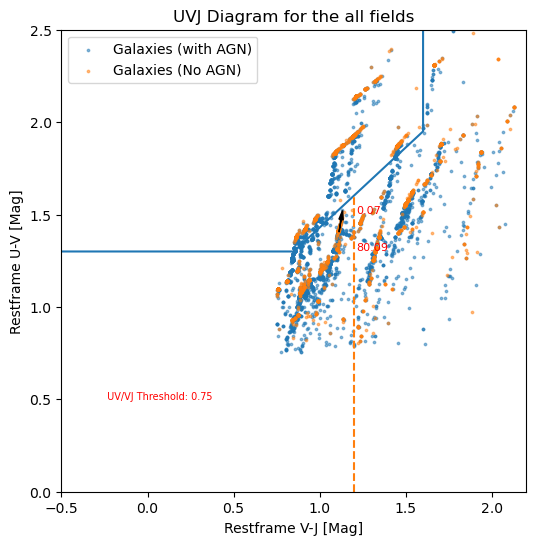

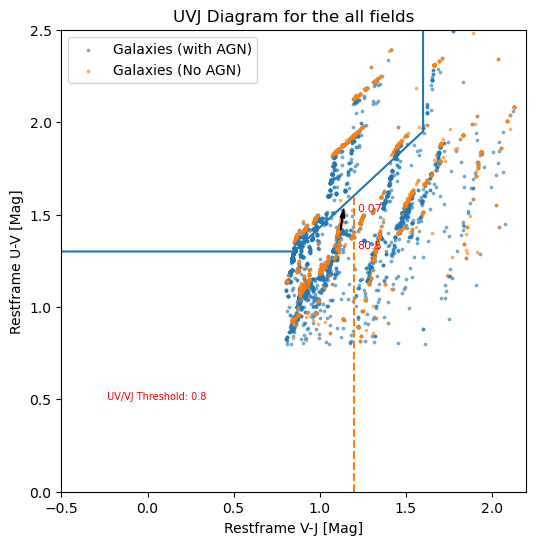

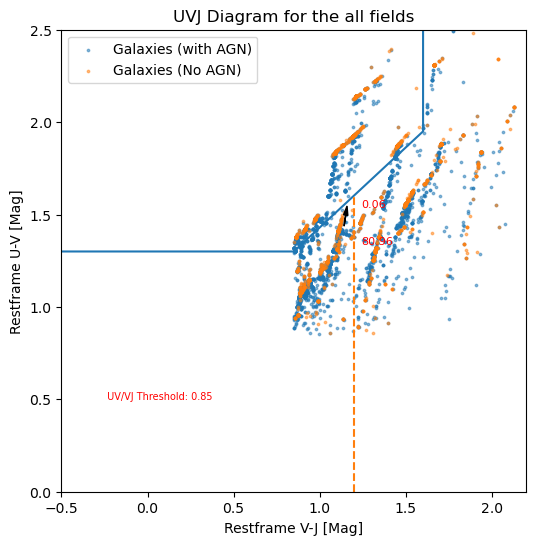

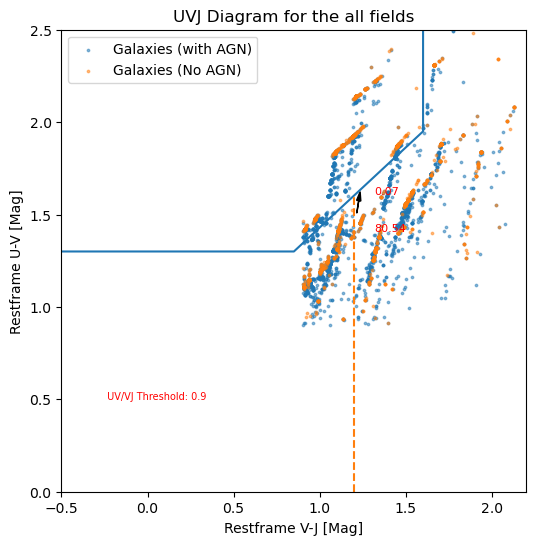

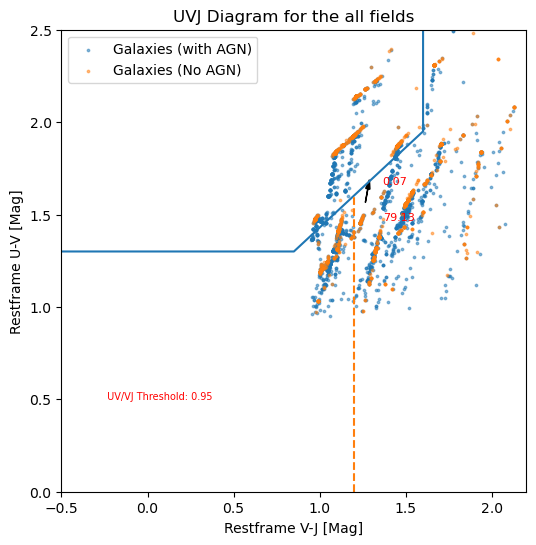

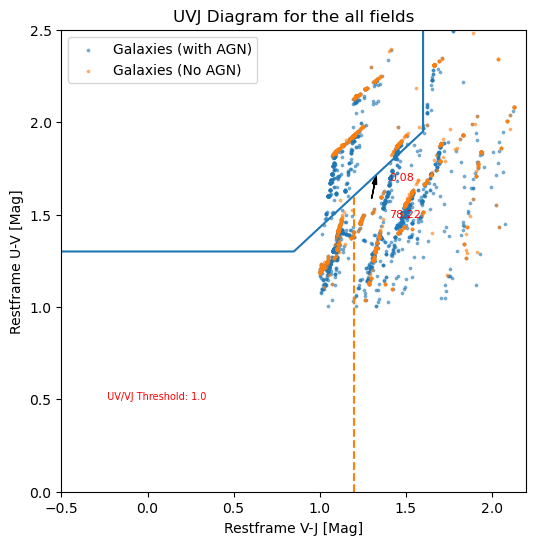

In [90]:
for threshold in thresholds:
    uv_thresh = threshold
    vj_thresh = threshold

    condition = (decomposed_colours['UV_Decomposed'] >= uv_thresh) & (decomposed_colours['VJ_Decomposed'] >= vj_thresh)

    # additional constraint on full colours
    condition = condition & (decomposed_colours['UV_Full'] >= uv_thresh) & (decomposed_colours['VJ_Full'] >= vj_thresh)


    decomposed_colours_filtered = decomposed_colours[condition]


    vj_galaxy_colours = decomposed_colours_filtered['VJ_Decomposed']
    uv_galaxy_colours = decomposed_colours_filtered['UV_Decomposed']

    # extract the original galaxy colours
    vj_full_colours = decomposed_colours_filtered['VJ_Full']
    uv_full_colours = decomposed_colours_filtered['UV_Full']


    # We would like to filter the colours to only include the galax


    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0


    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)


    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # as all the points have associated names, plot the names
    #for i, txt in enumerate(df['ID']):
    #    plt.annotate(txt, (x[i], y[i]))
        
    # plot the points
    plt.scatter(vj_full_colours, uv_full_colours, s=3, alpha=0.5, label='Galaxies (with AGN)')

    plt.scatter(vj_galaxy_colours, uv_galaxy_colours, s=3, alpha=0.5, label='Galaxies (No AGN)')


    # Instead of plotting all arrows, define an average arrow 
    # we want to get the average location of each set of points, and plot the transition


    # Get the average location of each set of points
    avg_vj_full = np.mean(vj_full_colours)
    avg_uv_full = np.mean(uv_full_colours)

    avg_vj_galaxy = np.mean(vj_galaxy_colours)
    avg_uv_galaxy = np.mean(uv_galaxy_colours)


    print(f'Average VJ Full: {avg_vj_full}'
        f'Average UV Full: {avg_uv_full}'
        f'Average VJ Galaxy: {avg_vj_galaxy}'
        f'Average UV Galaxy: {avg_uv_galaxy}')

    # Plot the average arrow
    plt.arrow(avg_vj_full, avg_uv_full, avg_vj_galaxy - avg_vj_full, avg_uv_galaxy - avg_uv_full, head_width=0.025, head_length=0.05, fc='k', ec='k')

    # Additionally plot some text next to the average arrow displaying the magnitude of the length of the arrow
    plt.text(avg_vj_full + 0.1, avg_uv_full + 0.1, f'{round(np.sqrt((avg_vj_galaxy - avg_vj_full)**2 + (avg_uv_galaxy - avg_uv_full)**2), 2)}', fontsize=8, color='red')

    # also calculate and plot the degrees
    angle = np.arctan2(avg_uv_galaxy - avg_uv_full, avg_vj_galaxy - avg_vj_full) * 180 / np.pi
    
    # Plot below the arrow 
    plt.text(avg_vj_full + 0.1, avg_uv_full - 0.1, f'{round(angle, 2)}', fontsize=8, color='red')
    
    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    # Include text with the threshold value
    plt.text(-0.25, 0.5, f' UV/VJ Threshold: {round(threshold, 2)}', fontsize=7, color='red')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the all fields')
    plt.legend()
    # Save the plot with the thresh value
    plt.savefig(f'outputs/UVJ_Diagram_with_AGN_decom_Allfields_Avg_{round(threshold, 2)}.png')
plt.show()

From running this analysis we see that by taking slices of this decomposition based on the threshold of values we are looking at, we can effectively see how the inital UVJ colours change. Notably we can see that mostly red quiescent galaxies, and dusty galaxies show the largest amount of change to their colurrs and moving up into the right most area shows that this transition will take place. 

In [83]:
# We would now like to combine this dataframe, with the cdfs, uds, and cosmos dataframes, so that we can generate insights into the information
# of the actual night sky sources.

#cdfs
zfourge_path = 'datasets/zfourge/'

# Read in ZFourge Data in each field

#CDFS, COSMOS, UDS
cdfs_df = read_zfourge_data('CDFS', zfourge_path)
cosmos_df = read_zfourge_data('COSMOS', zfourge_path)
uds_df = read_zfourge_data('UDS', zfourge_path)


c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\Documents\GitHub\HonoursResearchProject\carf.py:1098: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, 'mag_V'] = flux_to_mag(df['V'])
c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\Documents\GitHub\HonoursResearchProject\carf.py:1099: Performanc

In [84]:
# Now I can choose to combine these dataframes into a master frame base
master_df = pd.concat([cdfs_df, cosmos_df, uds_df])


In [85]:
master_df

# rename id to ID
master_df = master_df.rename(columns={'id': 'ID'})

In [86]:
decomposed_colours

,ID,UV_Full,VJ_Full,UV_Decomposed,VJ_Decomposed,zpk
0,CDFS_5880,0.940855,0.856496,0.940855,0.856496,1.8316
1,CDFS_5886,0.686662,0.398037,0.687522,0.396862,1.1001
2,CDFS_5928,1.708819,1.109138,1.874559,1.133087,0.7154
3,CDFS_5972,0.999376,0.905876,0.987690,0.873039,0.9668
4,CDFS_6034,0.955992,0.557912,0.955997,0.557744,0.3502
...,...,...,...,...,...,...
22279,UDS_22073,0.913174,0.508098,0.913174,0.508098,0.6068
22280,UDS_22077,1.211908,1.093357,1.410744,1.106698,1.3994
22281,UDS_22078,0.910516,0.735718,0.910699,0.733106,1.7649
22282,UDS_22086,0.913174,0.508098,0.913174,0.508098,0.7740


In [87]:
# Now we would like to merge the decomposed colours with the master dataframe

master_df = master_df.merge(decomposed_colours, on='ID', how='inner')

In [88]:
master_df

,recno,ID,xpos,ypos,RAJ2000,DEJ2000,SE,isoArea,FKsap,e_FKsap,...,w_FK,FY,e_FY,w_FY,wminAll,UV_Full,VJ_Full,UV_Decomposed,VJ_Decomposed,zpk_y
0,5880,CDFS_5880,4918.070,2205.127,53.060547,-27.883299,3,134.0,3.12787,0.10767,...,NaN,NaN,NaN,NaN,NaN,0.940855,0.856496,0.940855,0.856496,1.8316
1,5886,CDFS_5886,4903.505,2218.433,53.061234,-27.882744,3,182.0,3.09289,0.10266,...,NaN,NaN,NaN,NaN,NaN,0.686662,0.398037,0.687522,0.396862,1.1001
2,5928,CDFS_5928,4865.992,2198.946,53.063004,-27.883558,3,68.0,3.42457,0.10040,...,NaN,NaN,NaN,NaN,NaN,1.708819,1.109138,1.874559,1.133087,0.7154
3,5972,CDFS_5972,4686.141,2261.246,53.071480,-27.880964,2,300.0,8.39165,0.08648,...,NaN,NaN,NaN,NaN,NaN,0.999376,0.905876,0.987690,0.873039,0.9668
4,6034,CDFS_6034,4700.024,2220.552,53.070828,-27.882660,3,30.0,0.51288,0.09210,...,NaN,NaN,NaN,NaN,NaN,0.955992,0.557912,0.955997,0.557744,0.3502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22270,22073,UDS_22073,893.519,4929.281,34.391899,-5.111294,0,58.0,1.03939,0.07892,...,0.77,NaN,NaN,0.0,0.67,0.913174,0.508098,0.913174,0.508098,0.6068
22271,22077,UDS_22077,529.058,4942.281,34.407147,-5.110752,3,161.0,3.08937,0.08013,...,0.85,NaN,NaN,0.0,0.65,1.211908,1.093357,1.410744,1.106698,1.3994
22272,22078,UDS_22078,982.913,4997.860,34.388161,-5.108436,0,167.0,5.49590,0.08340,...,0.76,NaN,NaN,0.0,0.60,0.910516,0.735718,0.910699,0.733106,1.7649
22273,22086,UDS_22086,4080.163,4739.570,34.258579,-5.119182,0,130.0,2.54756,0.06966,...,1.06,NaN,NaN,0.0,0.86,0.913174,0.508098,0.913174,0.508098,0.7740


In [89]:
# Now that we gave a dataframe containing enough of the information that we are concerend with we should be able to generate some insights
